# QCoDeS Example with Stanford SR830

In [1]:
# IMPORTS

#%matplotlib notebook
import qcodes as qc
import os
import numpy as np
from qcodes.instrument_drivers.stanford_research.SR830 import SR830
from SR830_ext import SR830_ext
from qcodes.instrument.base import Instrument
from qcodes.utils.validators import Numbers, Arrays
from qcodes.utils.dataset import doNd




from qcodes import initialise_or_create_database_at, load_or_create_experiment, load_by_id
tutorial_db_path = os.path.join(os.getcwd(), 'tutorial_doND.db')
initialise_or_create_database_at(tutorial_db_path)
load_or_create_experiment(experiment_name='tutorial_exp', sample_name="no sample")

tutorial_exp#no sample#1@C:\Users\Farzad\Documents\Rasmus\SR830ext\tutorial_doND.db
-----------------------------------------------------------------------------------
1-results-1-lockin_setpoints,lockin_trace-1
2-results-2-gen2_v_now,lockin_setpoints,lockin_trace-20
3-results-3-lockin_setpoints,lockin_trace-1
4-results-4-gen2_v_now,lockin_setpoints,lockin_trace-20
5-results-5-lockin_setpoints,lockin_trace-0
6-results-6-lockin_setpoints,lockin_trace-0
7-results-7-lockin_setpoints,lockin_trace-1
8-results-8-gen2_v_now,lockin_setpoints,lockin_trace-20
9-results-9-lockin_setpoints,lockin_trace-1
10-results-10-lockin_setpoints,lockin_trace-1
11-results-11-gen2_v_now,lockin_setpoints,lockin_trace-20

In [2]:
class DummyGenerator(Instrument):

    def __init__(self, name, **kwargs):

        super().__init__(name, **kwargs)

        self.add_parameter('v_start',
                           initial_value=0,
                           unit='V',
                           label='v start',
                           vals=Numbers(0,1e3),
                           get_cmd=None,
                           set_cmd=None)

        self.add_parameter('v_stop',
                           initial_value=1,
                           unit='V',
                           label='v stop',
                           vals=Numbers(1,1e3),
                           get_cmd=None,
                           set_cmd=None)
        
        self.add_parameter('v_now',
                           initial_value=0,
                           unit='V',
                           label='v_now',
                           vals=Numbers(self.v_start(),self.v_stop()),
                           get_cmd=None,
                           set_cmd=None)

In [3]:
gen = DummyGenerator('gen')
gen2 = DummyGenerator('gen2')

In [4]:
# CONNECT TO INSTRUMENT

sr = SR830_ext('lockin', 'GPIB0::1::INSTR')

Connected to: Stanford_Research_Systems SR830 (serial:s/n40974, firmware:ver1.07) in 0.83s


In [5]:
sr.ch1_display('X')
sr.ch1_ratio('none')
sr.buffer_SR('Trigger')
sr.buffer_trig_mode.set('ON')
sr.set_sweep_parameters(gen.v_now, 0,0.5,20,0.2, label="Voltage")

## List of parameters

Starting experimental run with id: 12. 


(results #12@C:\Users\Farzad\Documents\Rasmus\SR830ext\tutorial_doND.db
 ----------------------------------------------------------------------
 lockin_setpoints - array
 lockin_trace - array,
 [<AxesSubplot:title={'center':'Run #12, Experiment tutorial_exp (no sample)'}, xlabel='Voltage (mV)', ylabel='Signal (μV)'>],
 [None])

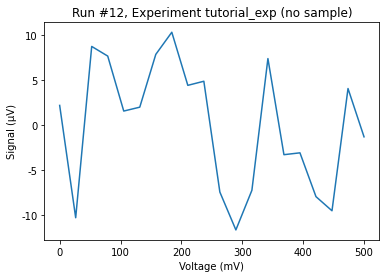

In [6]:
doNd.do0d(sr.trace,do_plot=True)

Starting experimental run with id: 13. 


(results #13@C:\Users\Farzad\Documents\Rasmus\SR830ext\tutorial_doND.db
 ----------------------------------------------------------------------
 gen2_v_now - numeric
 lockin_setpoints - array
 lockin_trace - array,
 [<AxesSubplot:title={'center':'Run #13, Experiment tutorial_exp (no sample)'}, xlabel='v_now (V)', ylabel='Voltage (mV)'>],
 [<matplotlib.colorbar.Colorbar at 0x210b63f3b48>])

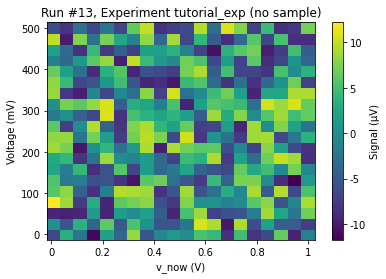

In [7]:
doNd.do1d(gen2.v_now, 0.01,1.0,20,1,sr.trace,do_plot=True)